In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [168]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [169]:
data.shape

(400, 11)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [171]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [172]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [173]:
data=pd.get_dummies(data,columns=['US','Urban'], drop_first=True)



In [174]:
data["Price"] = pd.cut(data["Price"], bins = [10002,30000,99620], labels = ["Bad", "Good"])


In [175]:
data = pd.get_dummies(data,columns = ["Price"],drop_first=True)


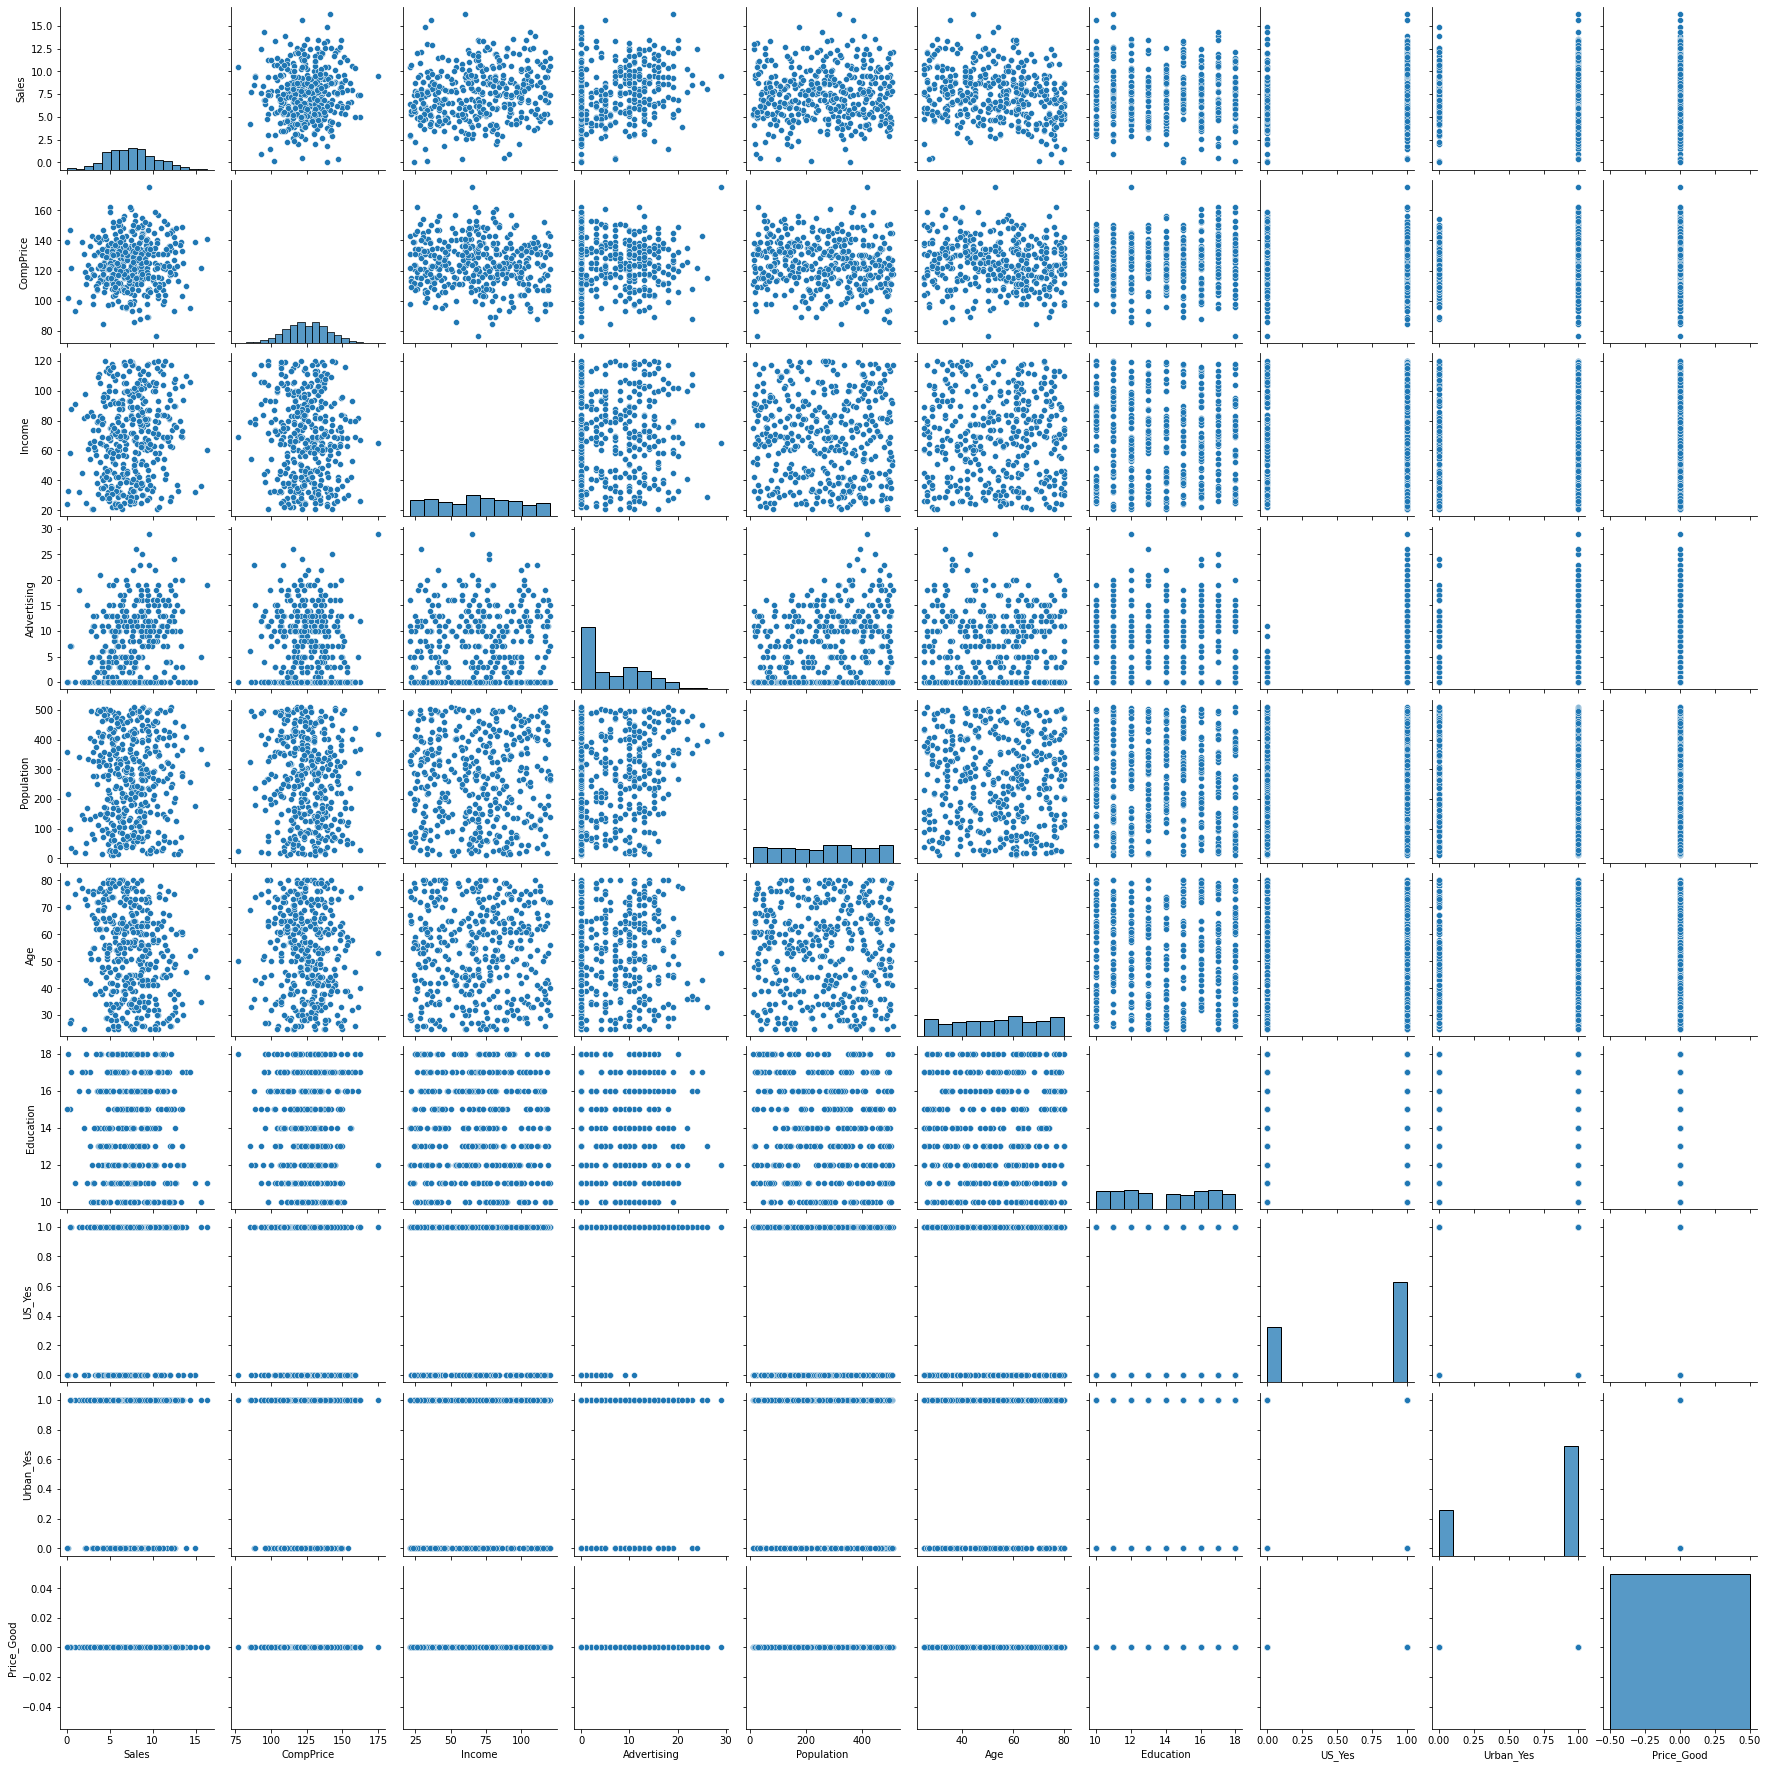

In [176]:
sns.pairplot(data)

<AxesSubplot:>

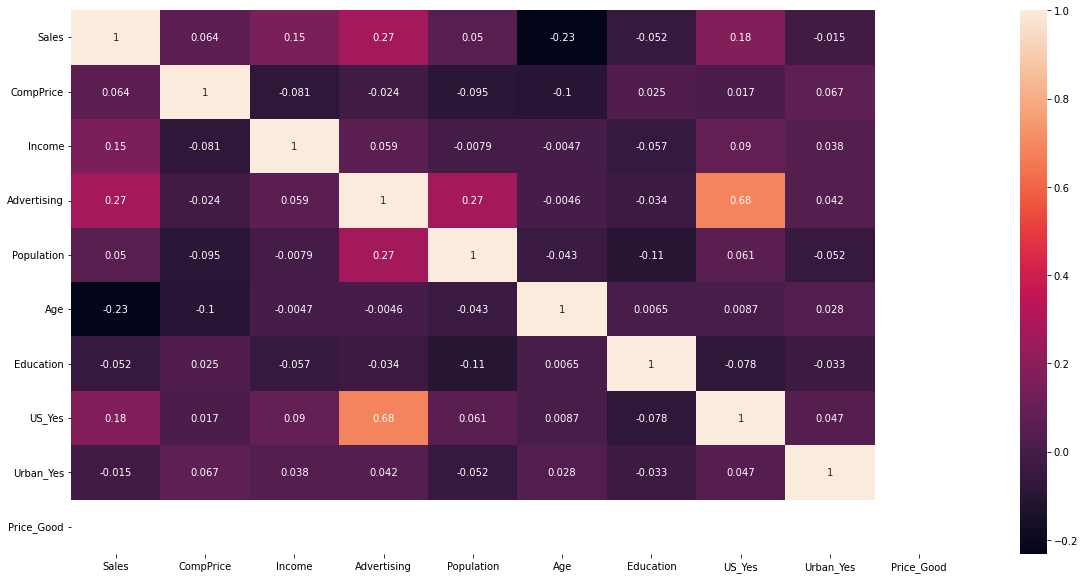

In [177]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [178]:
x=data.iloc[:,0:6]
y=data['ShelveLoc']

In [179]:
x

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc
0,9.50,138,73,11,276,Bad
1,11.22,111,48,16,260,Good
2,10.06,113,35,10,269,Medium
3,7.40,117,100,4,466,Medium
4,4.15,141,64,3,340,Bad
...,...,...,...,...,...,...
395,12.57,138,108,17,203,Good
396,6.14,139,23,3,37,Medium
397,7.41,162,26,12,368,Medium
398,5.94,100,79,7,284,Bad


In [180]:
y

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

In [181]:
data['ShelveLoc'].unique() 

array(['Bad', 'Good', 'Medium'], dtype=object)

In [182]:
data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [183]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'ShelveLoc',
 'Age',
 'Education',
 'US_Yes',
 'Urban_Yes',
 'Price_Good']

In [184]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)



In [185]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,6:])
data_norm.tail(10)


,Age,Education,US_Yes,Urban_Yes,Price_Good
390,0.763636,0.250,1.0,1.0,NaN
391,0.563636,0.750,0.0,1.0,NaN
392,0.163636,0.375,1.0,1.0,NaN
393,0.090909,0.875,1.0,0.0,NaN
394,0.145455,0.750,1.0,1.0,NaN
395,0.145455,0.500,1.0,1.0,NaN
396,0.545455,0.125,1.0,0.0,NaN
397,0.272727,1.000,1.0,1.0,NaN
398,0.454545,0.250,1.0,1.0,NaN
399,0.436364,0.750,1.0,1.0,NaN


In [186]:
from sklearn.model_selection import train_test_split


In [187]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)          # Splitting data into training and testing data set

In [188]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass


In [189]:
##Splitting the data into featuers and labels
features = data.iloc[:,0:5]
labels = data.iloc[:,5]


In [190]:
## Collecting the column names
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test


In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)



In [192]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [193]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

C:\Users\ANIL REDDY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3

In [194]:
model.oob_score_

0.51875

In [195]:
##Predictions on train data
prediction = model.predict(x_train)

In [196]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)


In [197]:
np.mean(prediction == y_train)

0.9875

In [198]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)


In [199]:
##Prediction on test data
pred_test = model.predict(x_test)


In [200]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)

#Building Decision Tree Classifier using Entropy Criteria

In [201]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [202]:
from sklearn import tree


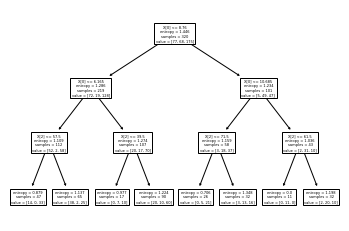

In [203]:
tree.plot_tree(model);             #PLot the decision tree

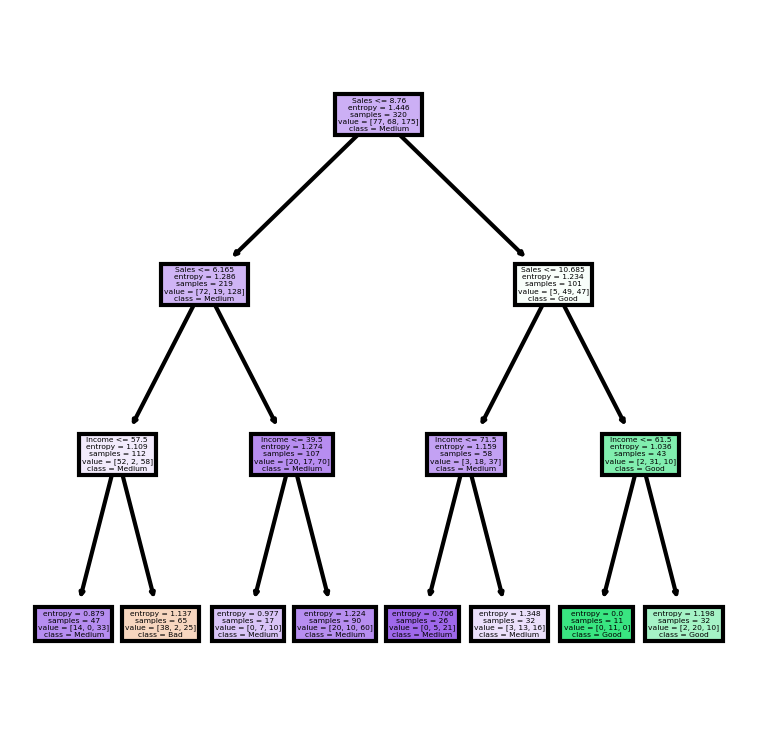

In [204]:
fn=['Sales',	'CompPrice', 	'Income',	'Advertising',	'Population',	'Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [205]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 


2    56
0    13
1    11
dtype: int64

In [206]:
preds

array([2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0])

In [207]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,0,1,2
ShelveLoc,,,
0,8,1,10
1,0,8,9
2,5,2,37


In [208]:
# Accuracy 
np.mean(preds==y_test)


0.6625

In [209]:
model.feature_importances_ 

array([0.74775939, 0.        , 0.25224061, 0.        , 0.        ])

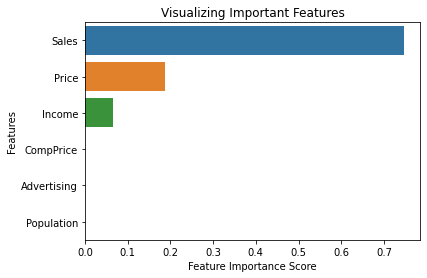

In [210]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [211]:
#Predicting on test data
preds = model.predict(x_test)                  # predicting on test data set 
pd.Series(preds).value_counts()                # getting the count of each category 

2    56
0    13
1    11
dtype: int64

In [212]:
preds

array([2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0])

In [213]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,8,1,10
1,0,8,9
2,5,2,37


In [214]:
np.mean(preds==y_test)          #accuracy

0.6625

#Building Decision Tree Classifier (CART) using Gini Criteria


In [215]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [216]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [217]:
pred=model.predict(x_test)
np.mean(preds==y_test)                       #Prediction and computing the accuracy 

0.6625

In [218]:
model.feature_importances_ 

array([0.74775939, 0.        , 0.25224061, 0.        , 0.        ])

#Decision Tree Regression

In [219]:
from sklearn.tree import DecisionTreeRegressor 

In [220]:
array = data.values
X = array[:,0:6]
y = array[:,3] 

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

In [222]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [223]:
model.score(X_test,y_test)           #accuracy

0.9974785292949051